(content:code-outputs)=

# Formatting code outputs

The formatting of code outputs is highly configurable.
Below we give examples of how to format particular outputs and even insert outputs into other locations of the document.

The [MyST cheat sheet](myst_cheatsheet) provides a [list of `code-cell` tags available](myst_cheatsheet:code-cell:tags)

:::{seealso}
The [MyST-NB documentation](myst-nb:use/format/cutomise), for how to fully customize the output renderer.
:::

(content:code-outputs:library-outputs)=
## Library output formatting

Many libraries support their own HTML output formatting, and this generally carries over to Jupyter Book outputs as well.

For example, the following cell uses Pandas to format cells based on their values:

In [1]:
import numpy as np
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

See the [Pandas Styling docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) for more information about styling DataFrames, and check out the documentation of your library of choice to see if they support similar features.

(content:code-outputs:scrolling)=
## Scrolling cell outputs

The traditional Jupyter Notebook interface allows you to toggle **output scrolling**
for your cells. This allows you to visualize part of a long output without it taking up
the entire page.

You can trigger this behavior in Jupyter Book by adding the following
tag to a cell's metadata:

```json
{
    "tags": [
        "output_scroll",
    ]
}
```

For example, the following cell has a long output, but will be scrollable in the book:

In [2]:
for ii in range(40):
    print(f"this is output line {ii}")

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39


(content:code-outputs:images)=
## Images

For any image types output by the code, we can apply formatting *via* cell metadata.
Then for the image we can apply all the variables of the standard [image directive](https://docutils.sourceforge.io/docs/ref/rst/directives.html#image):

```{margin}
Units of length are: 'em', 'ex', 'px', 'in', 'cm', 'mm', 'pt', 'pc'
```

- **width**: length or percentage (%) of the current line width
- **height**: length
- **scale**: integer percentage (the "%" symbol is optional)
- **align**: "top", "middle", "bottom", "left", "center", or "right"
- **classes**: space separated strings
- **alt**: string

We can also set a caption (which is rendered as [CommonMark](https://commonmark.org/)) and name by which to reference the figure. The code

````md
```{code-cell} ipython3
---
render:
  image:
    width: 200px
    alt: fun-fish
    classes: shadow bg-primary
  figure:
    caption: |
      Hey everyone its **party** time!
    name: fun-fish
---
from IPython.display import Image
Image("../images/fun-fish.png")
```
````

produces the following code cell and figure:

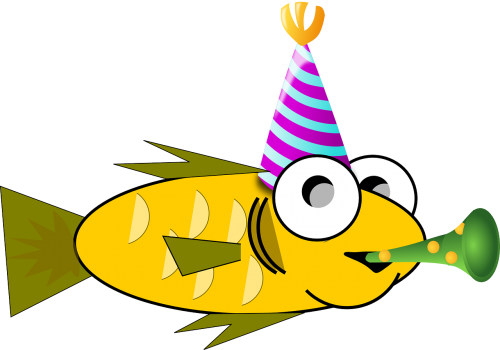

In [3]:
from IPython.display import Image
Image("../images/fun-fish.png")

Now we can link to the image from anywhere in our documentation: [swim to the fish](fun-fish)

:::{seealso}
[](jupyter-cell-tags)
:::

(content:code-outputs:markdown)=
## Markdown

Markdown output is parsed by MyST-Parser, currently with the parsing set to strictly [CommonMark](https://commonmark.org/).

The parsed Markdown is then integrated into the wider context of the document. This means it is possible, for example, to include internal references:

In [4]:
from IPython.display import display, Markdown
display(Markdown('**_some_ markdown** and an [internal reference](use/format/markdown)!'))

**_some_ markdown** and an [internal reference](use/format/markdown)!

and even internal images can be rendered, as the code below exemplifies:

In [5]:
display(Markdown('![figure](../images/logo.png)'))

![figure](../images/logo.png)

(content:code-outputs:ansi)=
## ANSI outputs

By default, the standard output/error streams and text/plain MIME outputs may contain ANSI escape sequences to change the text and background colors.

In [6]:
import sys
print("BEWARE: \x1b[1;33;41mugly colors\x1b[m!", file=sys.stderr)
print("AB\x1b[43mCD\x1b[35mEF\x1b[1mGH\x1b[4mIJ\x1b[7m"
      "KL\x1b[49mMN\x1b[39mOP\x1b[22mQR\x1b[24mST\x1b[27mUV")

ABCDEFGHIJKLMNOPQRSTUV


BEWARE: ugly colors!


This uses the built-in {py:class}`~myst-nb:myst_nb.ansi_lexer.AnsiColorLexer` [pygments lexer](https://pygments.org/).
You can change the lexer used in the `_config.yml`, for example to turn off lexing:

```yaml
sphinx:
  config:
    nb_render_text_lexer: "none"
```

The following code shows the 8 basic ANSI colors it is based on.
Each of the 8 colors has an “intense” variation, which is used for bold text.

In [7]:
text = " XYZ "
formatstring = "\x1b[{}m" + text + "\x1b[m"

print(
    " " * 6
    + " " * len(text)
    + "".join("{:^{}}".format(bg, len(text)) for bg in range(40, 48))
)
for fg in range(30, 38):
    for bold in False, True:
        fg_code = ("1;" if bold else "") + str(fg)
        print(
            " {:>4} ".format(fg_code)
            + formatstring.format(fg_code)
            + "".join(
                formatstring.format(fg_code + ";" + str(bg)) for bg in range(40, 48)
            )
        )

            40   41   42   43   44   45   46   47  
   30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 


:::{note}
ANSI also supports a set of 256 indexed colors.
This is currently not supported, but we hope to introduce it at a later date
(raise an issue on the repository if you require it!).
:::

(content:code-outputs:priority)=
## Render priority

When Jupyter executes a code cell it can produce multiple outputs, and each of these outputs can contain multiple [MIME media types](https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types) to use with different output formats (like HTML or LaTeX).

MyST-NB stores a default priority dictionary for most of the common [output builders](https://www.sphinx-doc.org/en/master/usage/builders/index.html), which you can also update in your `_config.yml`.
For example, this is the default priority list for HTML:

```yaml
sphinx:
  config:
    nb_render_priority:
      html:
      - "application/vnd.jupyter.widget-view+json"
      - "application/javascript"
      - "text/html"
      - "image/svg+xml"
      - "image/png"
      - "image/jpeg"
      - "text/markdown"
      - "text/latex"
      - "text/plain"
```

(content:code-outputs:glue)=
## Insert code outputs into page content

You often wish to run analyses in one notebook and insert them in your
documents elsewhere. For example, if you'd like to include a figure,
or if you want to cite an analysis that you have run.

```{margin}
Currently, `glue` only works with Python.
```

The `glue` tool from [MyST-NB](https://myst-nb.readthedocs.io/)
allows you to add a key to variables in a notebook,
then display those variables in your book by referencing the key. It
follows a two-step process:

* **Glue a variable to a name**. Do this by using
  the `myst_nb.glue` function on a variable
  that you'd like to re-use elsewhere in the book. You'll give the variable
  a name that can be referenced later.
* **Reference that variable from your page's content**. Then, when you are
  writing your content, insert the variable into your text by using a
  `{glue:}` role.

We'll cover each step in more detail below.

```{margin}
For more information about roles, see {doc}`myst`.
```

(glue/gluing)=
### Gluing variables in your notebook

You can use `myst_nb.glue()` to assign the value of a variable to
a key of your choice. `glue` will store all of the information that is normally used to **display**
that variable (i.e., whatever happens when you display the variable by putting it at the end of a
code cell). Choose a key that you will remember, as you will use it later.

The following code glues a variable inside the notebook to the key `"cool_text"`:

In [8]:
from myst_nb import glue
my_variable = "here is some text!"
glue("cool_text", my_variable)

'here is some text!'

You can then insert it into your text. Adding
`` {glue:}`cool_text` `` to your content results in the
following: {glue:}`cool_text`.

#### Gluing numbers, plots, and tables

You can glue anything in your notebook and display it later with `{glue:}`. Here
we'll show how to glue and paste **numbers and images**. We'll simulate some
data and run a simple bootstrap on it. We'll hide most of this process below,
to focus on the glueing part.

In [9]:
# Simulate some data and bootstrap the mean of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

In the cell below, `data` contains our data, and `bootstrap_indices` is a collection of sample indices in each bootstrap. Below we'll calculate a few statistics of interest, and
**`glue()`** them into the notebook.

In [10]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

2.99758724978736

2.985312582852057

3.0098125309029817

By default, `glue` will display the value of the variable you are gluing. This
is useful for sanity-checking its value at glue-time. If you'd like to **prevent display**,
use the `display=False` option. Note that below, we also *overwrite* the value of
`boot_chi` (but using the same value):

In [11]:
glue("boot_chi_notdisplayed", chi, display=False)

3.0098125309029817

You can also glue visualizations, such as Matplotlib figures (here we use `display=False` to ensure that the figure isn't plotted twice):

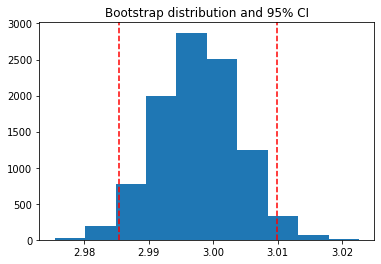

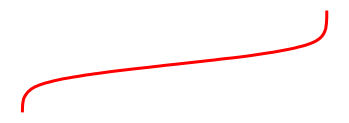

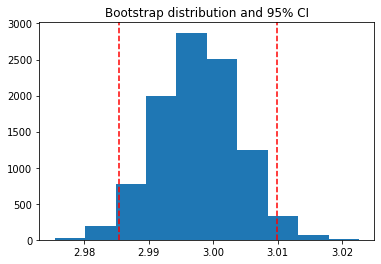

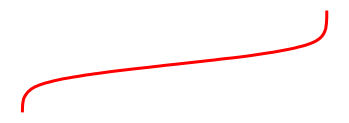

In [12]:
# Visualize the historgram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")

# And a wider figure to show a timeseries
fig2, ax = plt.subplots(figsize=(6, 2))
ax.plot(np.sort(means), lw=3, c='r')
ax.set_axis_off()

glue("boot_fig", fig, display=False)
glue("sorted_means_fig", fig2, display=False)

The same can be done for `DataFrame`s (or other table-like objects) as well.

In [13]:
bootstrap_subsets = data[bootstrap_indices][:3, :5].T
df = pd.DataFrame(bootstrap_subsets, columns=["first", "second", "third"])
glue("df_tbl", df)

first    second     third
0  2.864279  3.096170  3.040294
1  2.850520  3.582923  2.632284
2  3.182612  3.026727  3.013184
3  3.159771  2.793257  3.151598
4  3.087032  3.159038  3.132074

```{tip}
Since we are going to paste this figure into our document at a later point,
you may wish to remove the output here, using the `remove-output` tag
(see {ref}`hiding/remove-content`).
```

(glue/pasting)=

### Pasting glued variables into your page

Once you have glued variables to their names, you can then **paste**
those variables into your text in your book anywhere you like (even on other pages).
These variables can be pasted using one of the roles or directives in the `glue` *family*.

#### The `glue` role/directive

The simplest role and directive is `glue:any`,
which pastes the glued output in-line or as a block respectively,
with no additional formatting.
Simply add this:

````
```{glue:} your-key
```
````

For example, we'll paste the plot we generated above with the following text:

````md
```{glue:} boot_fig
```
````

Here's how it looks:

```{glue:} boot_fig
```

Or we can paste in-line objects like so:

```md
In-line text; {glue:}`boot_mean`, and a figure: {glue:}`boot_fig`.
```

In-line text; {glue:}`boot_mean`, and a figure: {glue:}`boot_fig`.

```{tip}
We recommend using wider, shorter figures when plotting in-line, with a ratio
around 6x2. For example, here's an in-line figure of sorted means
from our bootstrap: {glue:}`sorted_means_fig`.
It can be used to make a visual point that isn't too complex! For more
ideas, check out [how sparklines are used](https://en.wikipedia.org/wiki/Sparkline).
```

Next we'll cover some more specific pasting functionality, which gives you more
control over how the pasted outputs look in your pages.

### Controlling the pasted outputs

You can control the pasted outputs by using a sub-command of `{glue:}`. These are used like so:
`` {glue:subcommand}`key` ``. These subcommands allow you to control more of the look, feel, and
content of the pasted output.

```{tip}
When you use `{glue:}` you are actually using shorthand for `{glue:any}`. This is a
generic command that doesn't make many assumptions about what you are gluing.
```

#### The `glue:text` role

The `glue:text` role is specific to text outputs.
For example, the following text:

```md
The mean of the bootstrapped distribution was {glue:text}`boot_mean` (95% confidence interval {glue:text}`boot_clo`/{glue:text}`boot_chi`).
```

Is rendered as:
The mean of the bootstrapped distribution was {glue:text}`boot_mean` (95% confidence interval {glue:text}`boot_clo`/{glue:text}`boot_chi`)

```{note}
`glue:text` only works with glued variables that contain a `text/plain` output.
```

With `glue:text` we can **add formatting to the output**.
This is particularly useful if you are displaying numbers and
want to round the results. To add formatting, use this syntax:

* `` {glue:text}`mykey:formatstring` ``

For example, ``My rounded mean: {glue:text}`boot_mean:.2f` `` will be rendered like this: My rounded mean: {glue:text}`boot_mean:.2f` (95% CI: {glue:text}`boot_clo:.2f`/{glue:text}`boot_chi:.2f`).

#### The `glue:figure` directive

With `glue:figure` you can apply more formatting to figure-like objects,
such as giving them a caption and referenceable label. For example,

````md
```{glue:figure} boot_fig
:figwidth: 300px
:name: "fig-boot"

This is a **caption**, with an embedded `{glue:text}` element: {glue:text}`boot_mean:.2f`!
```
````

produces the following figure:

```{glue:figure} boot_fig
:figwidth: 300px
:name: "fig-boot"

This is a **caption**, with an embedded `{glue:text}` element: {glue:text}`boot_mean:.2f`!
```

Later, the code

```md
Here is a {ref}`reference to the figure <fig-boot>`
```

can be used to reference the figure.

Here is a {ref}`reference to the figure <fig-boot>`

Here's a table:

````md
```{glue:figure} df_tbl
:figwidth: 300px
:name: "tbl:df"

A caption for a pandas table.
```

````

which gets rendered as

```{glue:figure} df_tbl
:figwidth: 300px
:name: "tbl:df"

A caption for a pandas table.
```

#### The `glue:math` directive

The `glue:math` directive is specific to LaTeX math outputs
(glued variables that contain a `text/latex` MIME type),
and works similarly to the [Sphinx math directive](https://www.sphinx-doc.org/en/1.8/usage/restructuredtext/directives.html#math).
For example, with this code we glue an equation:

In [14]:
import sympy as sym
f = sym.Function('f')
y = sym.Function('y')
n = sym.symbols(r'\alpha')
f = y(n)-2*y(n-1/sym.pi)-5*y(n-2)
glue("sym_eq", sym.rsolve(f,y(n),[1,4]))

(sqrt(5)*I)**\alpha*(1/2 - 2*sqrt(5)*I/5) + (-sqrt(5)*I)**\alpha*(1/2 + 2*sqrt(5)*I/5)

and now we can use the following code:

````md
```{glue:math} sym_eq
:label: eq-sym
```
````

to insert the equation here:

```{glue:math} sym_eq
:label: eq-sym
```

% TODO: figure out why this isn't working
% Which we then reference as Equation {eq}`eq-sym`.

```{note}
`glue:math` only works with glued variables that contain a `text/latex` output.
```

### Advanced `glue` use-cases

Here are a few more specific and advanced uses of the `glue` submodule.

#### Pasting into tables

In addition to pasting blocks of outputs, or in-line with text, you can also paste directly
into tables. This allows you to compose complex collections of structured data using outputs
that were generated in other cells or other notebooks. For example, the following Markdown table:

````md
| name                            |       plot                    | mean                      | ci                                                |
|:-------------------------------:|:-----------------------------:|---------------------------|---------------------------------------------------|
| histogram and raw text          | {glue:}`boot_fig`             | {glue:}`boot_mean`          | {glue:}`boot_clo`-{glue:}`boot_chi`                   |
| sorted means and formatted text | {glue:}`sorted_means_fig`     | {glue:text}`boot_mean:.3f` | {glue:text}`boot_clo:.3f`-{glue:text}`boot_chi:.3f` |
````

Results in:

| name                            |       plot                  | mean                      | ci                                                |
|:-------------------------------:|:---------------------------:|---------------------------|---------------------------------------------------|
| histogram and raw text          | {glue:}`boot_fig`             | {glue:}`boot_mean`          | {glue:}`boot_clo`-{glue:}`boot_chi`                   |
| sorted means and formatted text | {glue:}`sorted_means_fig`     | {glue:text}`boot_mean:.3f` | {glue:text}`boot_clo:.3f`-{glue:text}`boot_chi:.3f` |